<a href="https://www.kaggle.com/code/vankudothkalyan/bank-customer-churn-prediction?scriptVersionId=182985115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Bank Customer Churn_Prediction

In [1]:
# import required librarys
import numpy as np 
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt  

2024-06-12 08:23:27.911072: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 08:23:27.911230: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 08:23:28.121975: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<!-- import data set from kaggle  -->

In [2]:
# Dataset path: "/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv"
bank = pd.read_csv("/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv", index_col="RowNumber")
bank.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


1. we are deleteing un nessasary columns in data sets 

In [3]:
bank.drop(['CustomerId', 'Surname'], axis = 1, inplace = True)
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


checking datatypes

In [4]:
bank.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
bank['Gender'].unique()

array(['Female', 'Male'], dtype=object)

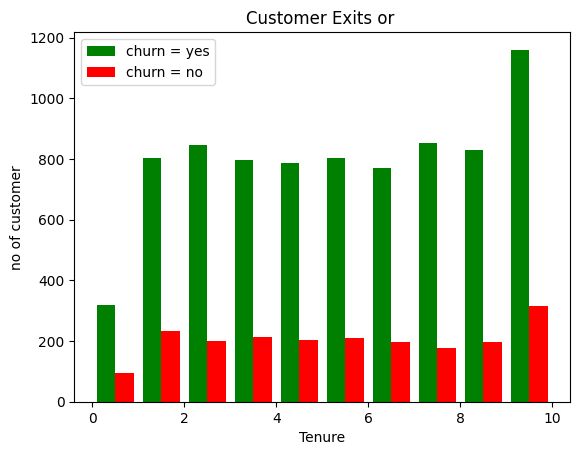

In [6]:
import matplotlib.pyplot as plt
tenure_churn_yes = bank[bank.Exited == 0].Tenure
tenure_churn_no = bank[bank.Exited == 1].Tenure

plt.xlabel('Tenure')
plt.ylabel('no of customer')
plt.title("Customer Exits or ")
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['churn = yes', 'churn = no'])
plt.legend()

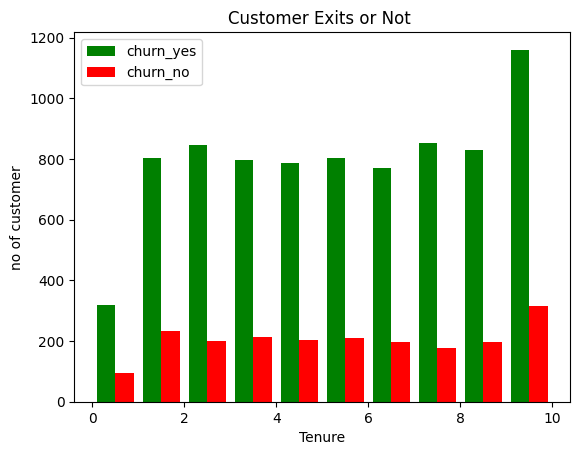

In [7]:
Salary_churn_yes = bank[bank.Exited ==0].EstimatedSalary
Salary_churn_no = bank[bank.Exited == 1].EstimatedSalary
plt.xlabel('Tenure')
plt.ylabel('no of customer')
plt.title("Customer Exits or Not ")
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['churn_yes', 'churn_no'])
plt.legend()

we are replacing the String data into int data for better model prediction 

In [8]:
bank['Gender'].replace(to_replace={'Male':1,'Female':0},inplace=True)
bank['Geography'].replace(to_replace={'France':2,'Spain':1,'Germany':0},inplace=True)
bank.head()

/tmp/ipykernel_18/2842074360.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank['Gender'].replace(to_replace={'Male':1,'Female':0},inplace=True)
/tmp/ipykernel_18/2842074360.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank['Gender'].replace(to_replace={'Male':1,'Female':0},inplace=True

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,2,0,42,2,0.00,1,1,1,101348.88,1
2,608,1,0,41,1,83807.86,1,0,1,112542.58,0
3,502,2,0,42,8,159660.80,3,1,0,113931.57,1
4,699,2,0,39,1,0.00,2,0,0,93826.63,0
5,850,1,0,43,2,125510.82,1,1,1,79084.10,0


printing all datatype columns 

In [9]:
bank.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

scaleing our data

In [10]:
#  to scaleing our model using min_max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scale_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
bank[scale_col] = scaler.fit_transform(bank[scale_col])

In [11]:
# Now, We need to normalize the columns with different ranges into a same range. This improves the accuracy of the our model.

for i in bank.columns:
  print(f'{i}:{bank[i].unique()}')

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

<!--  -->

# Creating Model and Training
In the following we want to split the data and train a NN model.


In [12]:
#  dividing column in x and y  
#  and spilt data set into train set and training set using train_test_split
x = bank.drop('Exited',axis='columns')
y = bank['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

# Building ANN Model

In [13]:
# 

from tensorflow import keras
import tensorflow as tf

model = keras.Sequential([
    keras.Input(shape=(10, )),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
              optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6472 - loss: 0.6437
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4794
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.4670
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.4680
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.4548
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4561
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8109 - loss: 0.4381
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8103 - loss: 0.4415
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8151 - loss: 0.4271
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8116 - loss: 0.4364
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8140 - loss: 0.4228
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [14]:
model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.03709551],
       [0.08138465],
       [0.06590014],
       ...,
       [0.01622785],
       [0.03026098],
       [0.07156347]], dtype=float32)

# Evaluation of the model

In [15]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8425 - loss: 0.3709


[0.37131404876708984, 0.8414999842643738]

In [16]:
yp = model.predict(X_test)
X_test[:10]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
7055,0.838,1,1,0.270270,0.6,0.000000,0.333333,0,0,0.521961
443,0.368,2,0,0.216216,0.7,0.484466,0.333333,1,1,0.350871
3955,0.758,2,0,0.216216,0.9,0.526595,0.000000,0,1,0.527039
2289,0.538,2,0,0.162162,0.7,0.281904,0.000000,1,1,0.804763
3197,0.520,2,1,0.243243,0.4,0.515908,0.333333,1,0,0.513183
6179,1.000,0,0,0.297297,0.4,0.390559,0.333333,0,0,0.533448
8352,0.470,2,0,0.162162,0.6,0.000000,0.333333,1,1,0.688796
5659,0.794,1,1,0.310811,0.9,0.000000,0.000000,1,0,0.162112
2066,0.552,2,1,0.202703,0.8,0.000000,0.333333,1,0,0.692530


In [17]:
y_pred = []
for i in yp:
  if i > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)
list(y_pred[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [18]:
y_test[:10]

RowNumber
7055    0
443     0
3955    0
2289    0
3197    0
6179    0
8352    0
5659    1
2066    0
414     1
Name: Exited, dtype: int64

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1595
           1       0.73      0.34      0.47       405

    accuracy                           0.84      2000
   macro avg       0.79      0.65      0.69      2000
weighted avg       0.83      0.84      0.82      2000



Let's see the confusion matrix

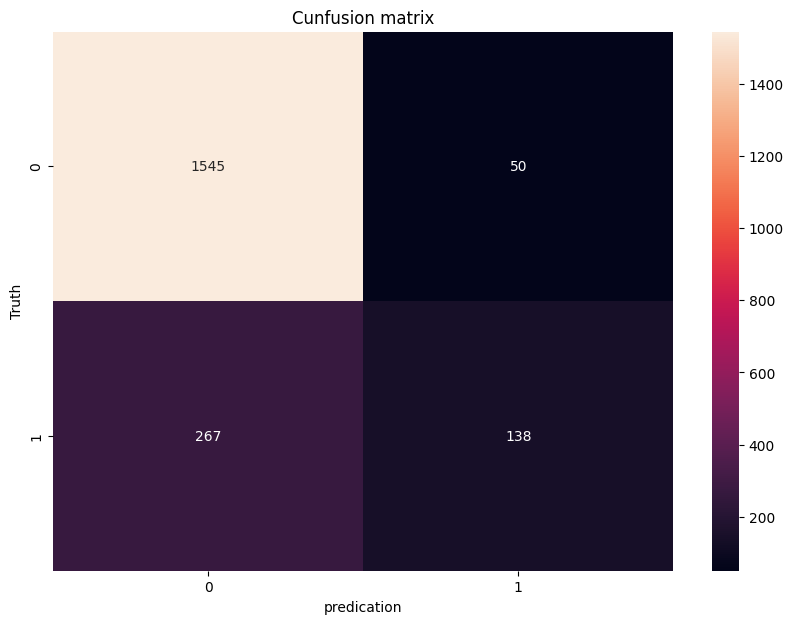

In [20]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10, 7))
plt.title('Cunfusion matrix')
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predication')
plt.ylabel('Truth')
plt.show()